In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [3]:
gdp_df.shape

(7662, 4)

7662 rows
4 columns

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Country or Area  =  object
***
Year = int64
***
Value = float64
***
Value Footnotes = float64

In [7]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [8]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [9]:
gdp_df.isna().any()

Country           False
Year              False
GDP_Per_Capita    False
dtype: bool

In [10]:
gdp_df.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661    False
Length: 7662, dtype: bool

In [11]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [12]:
num_years = max(gdp_df.Year) - min(gdp_df.Year)
print(num_years)

32


In [13]:
countries_missing_data = gdp_df.Country.value_counts().reset_index().sort_values(by = 'count', ascending = True)
countries_missing_data = countries_missing_data.loc[countries_missing_data['count'] < max(gdp_df.Year) - min(gdp_df.Year) + 1]
countries_missing_data

,Country,count
241,Djibouti,10
240,Somalia,10
239,Turks and Caicos Islands,12
238,Sint Maarten (Dutch part),14
237,Kosovo,15
236,Cayman Islands,16
235,Nauru,19
234,Afghanistan,20
233,SÃ£o TomÃ© and Principe,22
232,CuraÃ§ao,22


In [14]:
missing_values = gdp_df.Year.value_counts().reset_index()
missing_values.sort_values(by = 'Year', ascending = False)

,Year,count
22,2022,232
8,2021,241
4,2020,242
7,2019,242
6,2018,242
5,2017,242
1,2016,242
3,2015,242
2,2014,242
0,2013,242


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
9. What was the median GDP per capita value in 2020?

In [16]:
gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020]

1        1968.341002
22       3455.023119
55       3957.933804
88      13278.369769
121     10844.770764
            ...     
7503    10450.622382
7536     5402.538773
7565    16204.169107
7598     3183.650773
7631     1990.319419
Name: GDP_Per_Capita, Length: 242, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

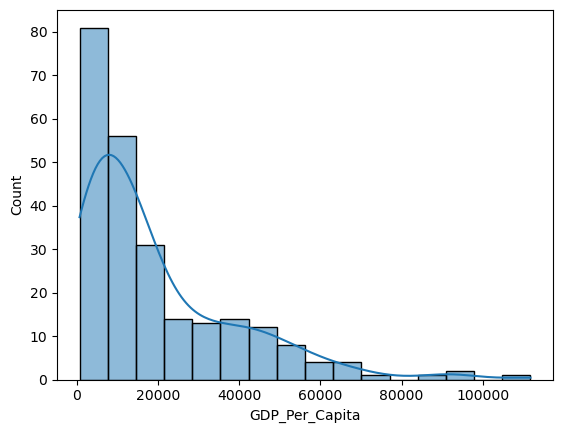

In [17]:
sns.histplot(gdp_df["GDP_Per_Capita"].loc[gdp_df.Year == 2020], kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

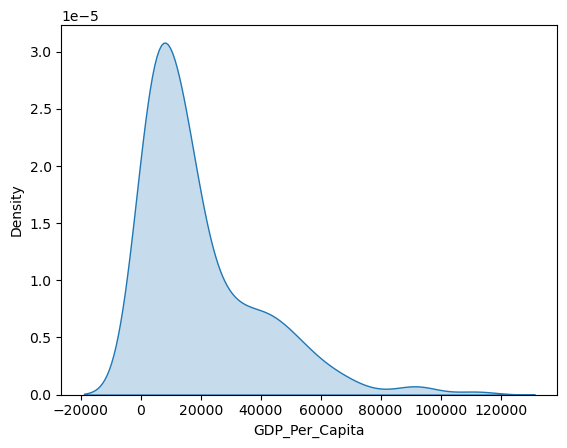

In [18]:
sns.kdeplot(gdp_df["GDP_Per_Capita"].loc[gdp_df.Year == 2020], fill=True)
plt.show

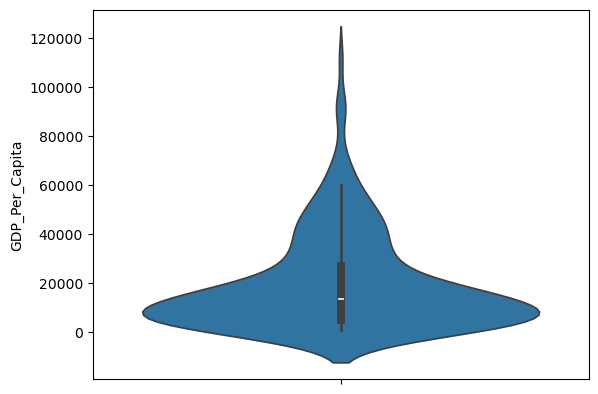

In [19]:
sns.violinplot(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])
plt.show()

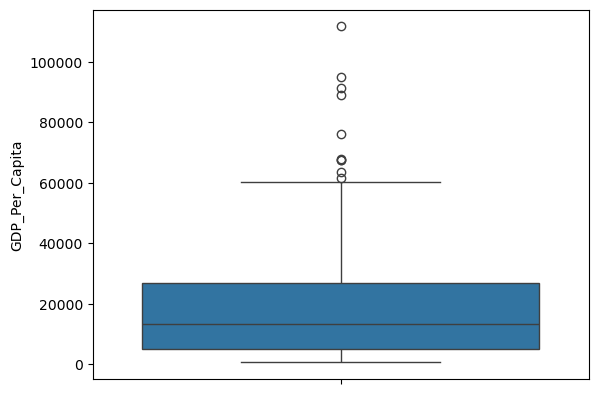

In [20]:
sns.boxplot(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])
plt.show()

In [21]:
import statistics as stats
stats.median(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])

13357.997573370474

In [22]:
gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 1990]

52      3037.297466
85      2788.301039
118     4827.027705
151     8828.874473
184     5793.084512
           ...     
7500    2774.138350
7533    2099.394649
7595    9705.981267
7628    2290.039226
7661    2704.757299
Name: GDP_Per_Capita, Length: 207, dtype: float64

In [23]:
gdp_decades = pd.DataFrame()
gdp_decades = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]
gdp_decades.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

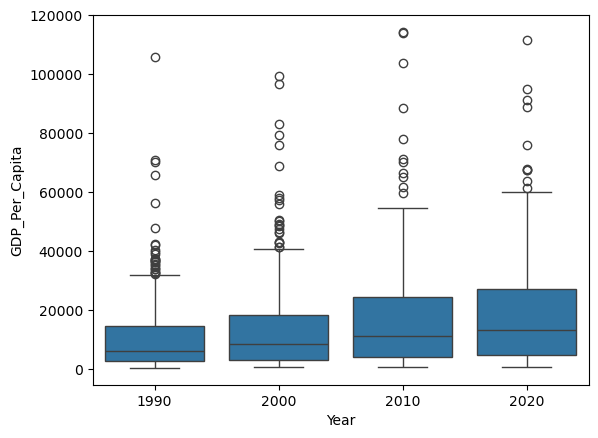

In [25]:
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

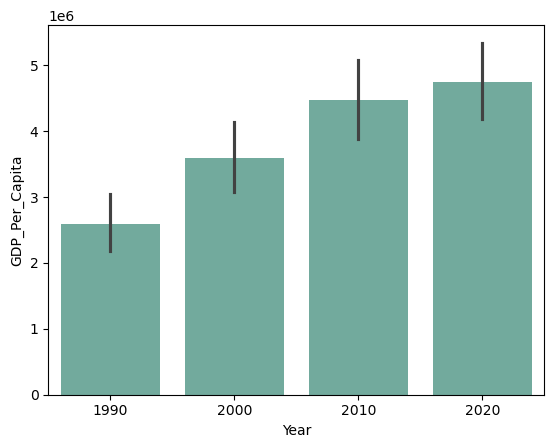

In [26]:
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    estimator=sum,  
    color='#69b3a2');

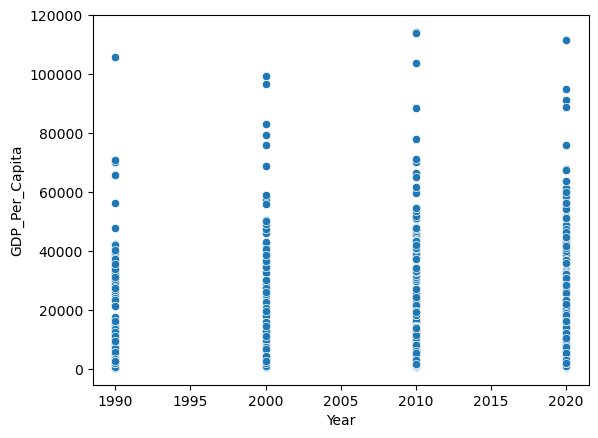

In [27]:
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

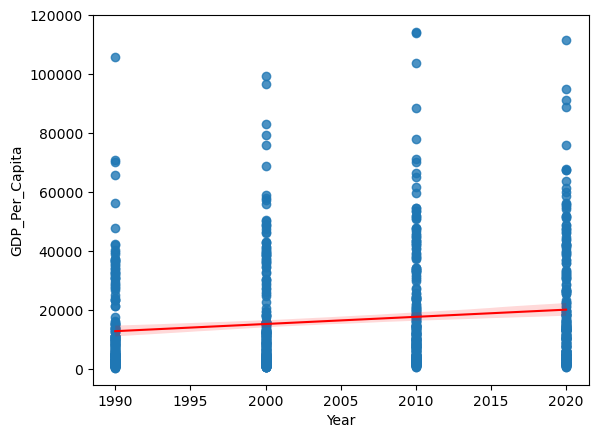

In [28]:
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5},
)
plt.show()

In [29]:
gdp_df.loc[gdp_df["GDP_Per_Capita"] > 100000].sort_values(by = "Year", ascending=True).head(1)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


In [30]:
gdp_df.loc[gdp_df["Year"] == 2020].sort_values(by = "GDP_Per_Capita", ascending=False).head(1)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


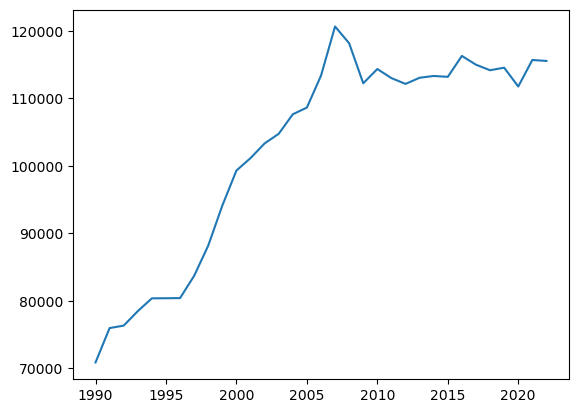

In [31]:
plt.plot('Year', 'GDP_Per_Capita', data=gdp_df.loc[gdp_df["Country"] == 'Luxembourg'])
plt.show()

In [32]:
gdp_df.loc[gdp_df["Year"] == 2020].sort_values(by = "GDP_Per_Capita", ascending=True).head(1)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


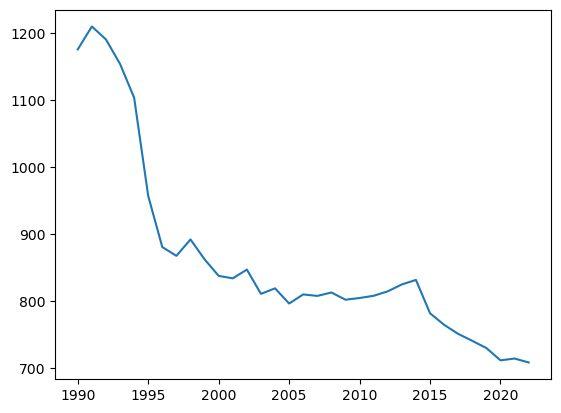

In [33]:
plt.plot('Year', 'GDP_Per_Capita', data=gdp_df.loc[gdp_df["Country"] == 'Burundi'])
plt.show()

In [70]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [78]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [80]:
internet_df = internet_df.rename(columns = {"Country or Area" : "Country", "Value" : "Internet_Users_Pct"})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [84]:
internet_df.Year.value_counts().reset_index().sort_values(by ='Year', ascending=False)

,Year,count
33,2023,11
25,2022,184
22,2021,186
23,2020,186
24,2019,185
27,2018,174
16,2017,205
15,2016,206
18,2015,203
17,2014,204


In [94]:
internet_df.loc[internet_df["Internet_Users_Pct"] > 0].sort_values(by = "Year", ascending=True)

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600
